In [32]:
import openeo
import rasterio

connection = openeo.connect(url='openeo.dataspace.copernicus.eu')

connection

<Connection to 'https://openeo.dataspace.copernicus.eu/openeo/1.2/' with NullAuth>

In [17]:
connection.list_collection_ids()

['SENTINEL3_OLCI_L1B',
 'SENTINEL3_SLSTR',
 'SENTINEL_5P_L2',
 'COPERNICUS_VEGETATION_PHENOLOGY_PRODUCTIVITY_10M_SEASON1',
 'COPERNICUS_VEGETATION_PHENOLOGY_PRODUCTIVITY_10M_SEASON2',
 'COPERNICUS_PLANT_PHENOLOGY_INDEX',
 'ESA_WORLDCOVER_10M_2020_V1',
 'ESA_WORLDCOVER_10M_2021_V2',
 'COPERNICUS_VEGETATION_INDICES',
 'SENTINEL2_L1C',
 'SENTINEL2_L2A',
 'SENTINEL1_GRD',
 'COPERNICUS_30',
 'LANDSAT8_L2',
 'SENTINEL3_SYN_L2_SYN',
 'SENTINEL3_SLSTR_L2_LST',
 'SENTINEL1_GLOBAL_MOSAICS']

In [18]:
connection.authenticate_oidc()

Authenticated using refresh token.


<Connection to 'https://openeo.dataspace.copernicus.eu/openeo/1.2/' with OidcBearerAuth>

In [19]:
connection.describe_collection('SENTINEL2_L2A')

{'assets': {'thumbnail': {'href': 'https://www.esa.int/var/esa/storage/images/esa_multimedia/images/2022/07/tallinn_estonia/24383281-1-eng-GB/Tallinn_Estonia_pillars.jpg',
   'roles': ['thumbnail'],
   'title': 'Sentinel 2 L2A',
   'type': 'image/png'}},
 'cube:dimensions': {'bands': {'type': 'bands',
   'values': ['B01',
    'B02',
    'B03',
    'B04',
    'B05',
    'B06',
    'B07',
    'B08',
    'B8A',
    'B09',
    'B11',
    'B12',
    'WVP',
    'AOT',
    'SCL',
    'sunAzimuthAngles',
    'sunZenithAngles',
    'viewAzimuthMean',
    'viewZenithMean']},
  't': {'extent': ['2015-07-04T00:00:00Z', None], 'type': 'temporal'},
  'x': {'axis': 'x',
   'extent': [-180, 180],
   'reference_system': {'$schema': 'https://proj.org/schemas/v0.2/projjson.schema.json',
    'area': 'World',
    'bbox': {'east_longitude': 180,
     'north_latitude': 90,
     'south_latitude': -90,
     'west_longitude': -180},
    'coordinate_system': {'axis': [{'abbreviation': 'Lat',
       'direction': 'north',
       'name': 'Geodetic latitude',
       'unit': 'degree'},
      {'abbreviation': 'Lon',
       'direction': 'east',
       'name': 'Geodetic longitude',
       'unit': 'degree'}],
     'subtype': 'ellipsoidal'},
    'datum': {'ellipsoid': {'inverse_flattening': 298.257223563,
      'name': 'WGS 84',
      'semi_major_axis': 6378137},
     'name': 'World Geodetic System 1984',
     'type': 'GeodeticReferenceFrame'},
    'id': {'authority': 'OGC', 'code': 'Auto42001', 'version': '1.3'},
    'name': 'AUTO 42001 (Universal Transverse Mercator)',
    'type': 'GeodeticCRS'},
   'step': 10,
   'type': 'spatial'},
  'y': {'axis': 'y',
   'extent': [-56, 83],
   'reference_system': {'$schema': 'https://proj.org/schemas/v0.2/projjson.schema.json',
    'area': 'World',
    'bbox': {'east_longitude': 180,
     'north_latitude': 90,
     'south_latitude': -90,
     'west_longitude': -180},
    'coordinate_system': {'axis': [{'abbreviation': 'Lat',
       'direction': 'north',
       'name': 'Geodetic latitude',
       'unit': 'degree'},
      {'abbreviation': 'Lon',
       'direction': 'east',
       'name': 'Geodetic longitude',
       'unit': 'degree'}],
     'subtype': 'ellipsoidal'},
    'datum': {'ellipsoid': {'inverse_flattening': 298.257223563,
      'name': 'WGS 84',
      'semi_major_axis': 6378137},
     'name': 'World Geodetic System 1984',
     'type': 'GeodeticReferenceFrame'},
    'id': {'authority': 'OGC', 'code': 'Auto42001', 'version': '1.3'},
    'name': 'AUTO 42001 (Universal Transverse Mercator)',
    'type': 'GeodeticCRS'},
   'step': 10,
   'type': 'spatial'}},
 'description': 'SENTINEL-2 is a wide-swath, high-resolution, multi-spectral imaging mission, supporting Copernicus Land Monitoring studies, including the monitoring of vegetation, soil and water cover, as well as observation of inland waterways and coastal areas. The SENTINEL-2 Multispectral Instrument (MSI) samples 13 spectral bands: four bands at 10 metres, six bands at 20 metres and three bands at 60 metres spatial resolution.\n The level 2A data is atmospherically corrected using Sen2Cor.',
 'extent': {'spatial': {'bbox': [[-180, -56, 180, 83]]},
  'temporal': {'interval': [['2015-07-04T00:00:00Z', None]]}},
 'id': 'SENTINEL2_L2A',
 'keywords': ['COPERNICUS',
  'ESA',
  'Orthoimagery',
  'Sentinel-2',
  'MSI',
  'Level-2A',
  'Radiometry',
  'Plant Resource',
  'TOC'],
 'license': 'proprietary',
 'links': [{'href': 'https://sentinels.copernicus.eu/documents/247904/690755/Sentinel_Data_Legal_Notice',
   'rel': 'license',
   'type': 'application/pdf'},
  {'href': 'https://documentation.dataspace.copernicus.eu/Data/SentinelMissions/Sentinel2.html#sentinel-2-level-2a-top-of-canopy-toc',
   'rel': 'alternate',
   'type': 'application/html'},
  {'href': 'https://dataspace.copernicus.eu/browser/?zoom=11&lat=45.36638&lng=12.49832&themeId=DEFAULT-THEME&visualizationUrl=https%3A%2F%2Fsh.dataspace.copernicus.eu%2Fogc%2Fwms%2F28b654e7-8912-4e59-9e58-85b58d768b3a&datasetId=S2

In [24]:
s2_cube = connection.load_collection('SENTINEL2_L2A',
    temporal_extent=('2022-05-01','2022-05-30'),
    spatial_extent={
        'west': 3.20,
        'south': 51.18,
        'east': 3.25,
        'north': 51.21,
        'crs': 'EPSG:4326',
    },
    bands=['B04','B03','B02'],
    max_cloud_cover=50,
)

s2_cube.download('TEST.tif')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-999..17912].


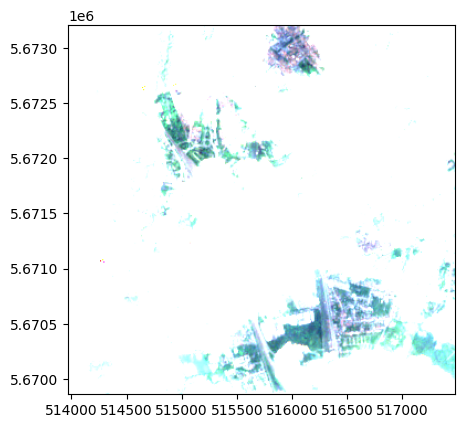

<Axes: >

In [26]:
img2  = rasterio.open('TEST.tif')

show(img2)

In [28]:
full_img = img2.read()
full_img

array([[[1198, 1088, 1160, ..., 2018, 2350, 2732],
        [1274, 1078, 1444, ..., 1620, 2004, 2448],
        [1338, 1250, 1494, ..., 1394, 1826, 2226],
        ...,
        [3840, 3432, 2962, ...,  394,  417,  560],
        [3688, 3372, 3046, ...,  334,  373,  424],
        [3440, 3320, 3200, ...,  330,  351,  387]],

       [[1150, 1154, 1328, ..., 2126, 2476, 2778],
        [1172, 1256, 1412, ..., 1690, 2168, 2530],
        [1230, 1432, 1368, ..., 1454, 1918, 2276],
        ...,
        [3828, 3484, 2928, ...,  664,  802, 1030],
        [3744, 3432, 3030, ...,  597,  686,  840],
        [3564, 3408, 3112, ...,  626,  657,  785]],

       [[1120,  918, 1124, ..., 2186, 2536, 2878],
        [1136,  878, 1350, ..., 1792, 2188, 2574],
        [1188, 1070, 1402, ..., 1578, 2064, 2326],
        ...,
        [3832, 3428, 2718, ...,  598,  694,  818],
        [3752, 3400, 2820, ...,  450,  496,  578],
        [3576, 3588, 2912, ...,  422,  491,  539]]],
      shape=(3, 335, 351), dtype=int1

In [29]:
num_bands = img2.count
print('Número de bandas na imagem =',num_bands)

Número de bandas na imagem = 3


In [45]:
img2_band1 = img2.read(1)
img2_band2 = img2.read(2)
img2_band3 = img2.read(3)
img2_band1


array([[1198, 1088, 1160, ..., 2018, 2350, 2732],
       [1274, 1078, 1444, ..., 1620, 2004, 2448],
       [1338, 1250, 1494, ..., 1394, 1826, 2226],
       ...,
       [3840, 3432, 2962, ...,  394,  417,  560],
       [3688, 3372, 3046, ...,  334,  373,  424],
       [3440, 3320, 3200, ...,  330,  351,  387]],
      shape=(335, 351), dtype=int16)

Text(0.5, 1.0, 'Band 3: B02')

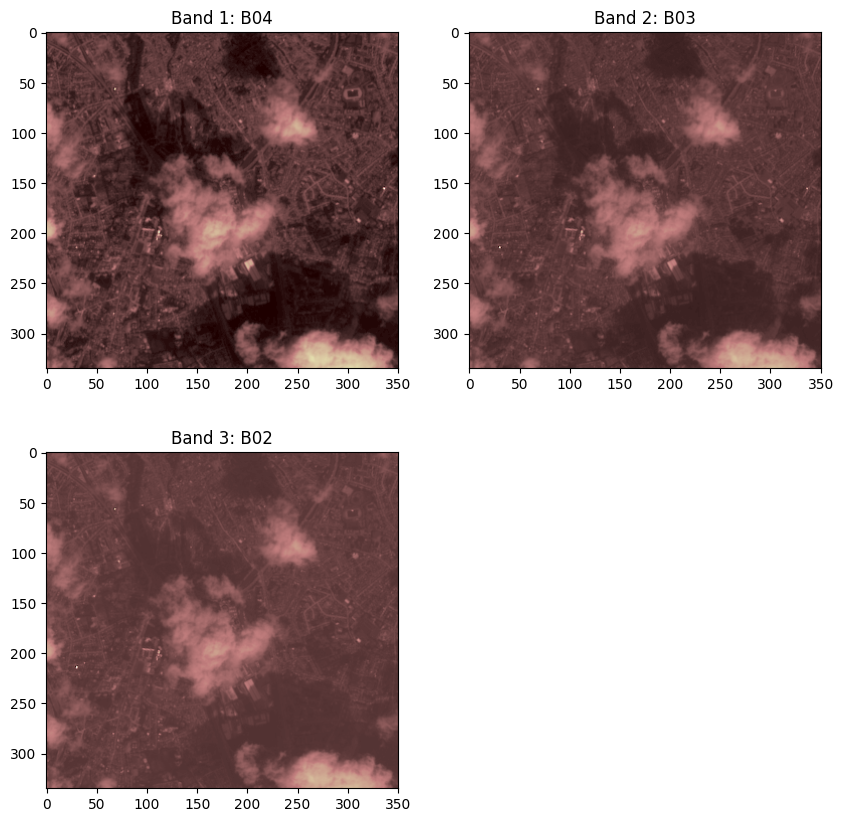

In [54]:
from matplotlib import pyplot as plt 


fig = plt.figure(figsize=(10,10))


ax1 = fig.add_subplot(2, 2, 1)
ax1.imshow(img2_band1, cmap='pink')
ax1.set_title('Band 1: B04')


ax2 = fig.add_subplot(2, 2, 2)
ax2.imshow(img2_band2, cmap='pink')
ax2.set_title('Band 2: B03')


ax3 = fig.add_subplot(2, 2, 3)
ax3.imshow(img2_band3, cmap='pink')
ax3.set_title('Band 3: B02')





In [55]:
print('Referência de coordenada:', img2.crs)

Referência de coordenada: EPSG:32631


In [58]:
metadata = img2.meta
print('Metadata: {metadata}\n'.format(metadata=metadata))

Metadata: {'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 351, 'height': 335, 'count': 3, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 31N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",3],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32631"]]'), 'transform': Affine(10.0, 0.0, 513970.0,
       0.0, -10.0, 5673210.0)}



In [59]:
desc = img2.descriptions
print('Raster description: {desc}\n'.format(desc=desc))

Raster description: ('B04', 'B03', 'B02')



In [60]:

print('Geotransform: ',img2.transform)

Geotransform:  | 10.00, 0.00, 513970.00|
| 0.00,-10.00, 5673210.00|
| 0.00, 0.00, 1.00|


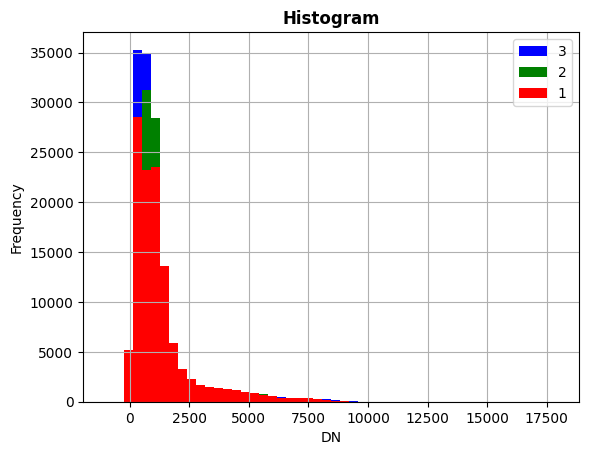

In [61]:
rasterio.plot.show_hist(full_img, bins=50, histtype='stepfilled', lw=0.0, stacked=False)

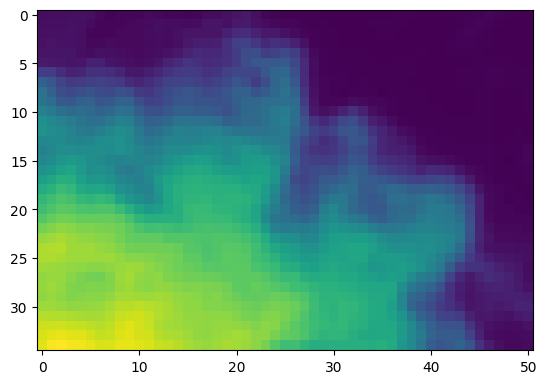

In [62]:
clipped_img = full_img[:, 300:900, 300:900]
plt.imshow(clipped_img[0,:,:])